In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sympy as sp

x = sp.Symbol('x', real=True)

In [2]:
def printMatrix(V,name='A'):
    print(f'Matrix {name} =\n')
    m = len(V)
    n = len(V[0])
    for i in range(m):
        for j in range(n):
            print(f'{V[i][j]:25.3f}',end='  ')
        print()
    print()


In [3]:
def mulregfit(x,y,degree):
    X_t = []
    y_t = []
    n = len(x)

    X_t.append(n)
    i = 1
    while(True):
        X_t.append(sum((x**i)))
        if(i/2 == degree):
            break
        i += 1   
    
    print(len(X_t))
    
    y_t.append(sum(y))
    for i in range(1,degree+1):        
        y_t.append(sum((x**i)*y))
    
    A = np.zeros((degree+1,degree+1),dtype=float)
    b = np.zeros((degree+1,1),dtype=float)

    for i in range(degree+1):
        k = i
        for j in range(degree+1):
            A[i,j] = X_t[k]
            k +=1
    
    for i in range(degree+1):
        b[i,0] = y_t[i]

    coefficients = np.matmul(np.linalg.inv(A),b)

    return coefficients[:,0],A,b

In [4]:
def y_predict(a,p):
    if isinstance(p, list):
        ret = []
        n = len(p)
        for i in range(n):
            temp = 0
            for j in range(len(a)):
                temp += a[j]*(p[i]**j)
            ret.append(temp)
        return ret

    else:
        ret = 0
        for j in range(len(a)):
            ret += a[j]*(p**j)
        return ret

In [18]:
df = pd.read_csv('Salary_Data.csv')

In [19]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [20]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [29]:
degree = 10          # degreee of fit

p =  4               # to be predicted

In [30]:
print(x)
print(y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [31]:
a,A,b = mulregfit(x,y,degree)

21


In [32]:
sp.pprint(sp.Matrix(A))
print("\n\n")
sp.pprint(sp.Matrix(b))

⎡      30.0             159.4             1080.5           8457.766          7
⎢                                                                             
⎢     159.4             1080.5           8457.766         72017.621        645
⎢                                                                             
⎢     1080.5           8457.766         72017.621        645033.57814      596
⎢                                                                             
⎢    8457.766         72017.621        645033.57814     5964562.19765    56346
⎢                                                                             
⎢   72017.621        645033.57814     5964562.19765    56346013.0528006  54047
⎢                                                                             
⎢  645033.57814     5964562.19765    56346013.0528006  540475743.904057  52443
⎢                                                                             
⎢ 5964562.19765    56346013.0528006  540475743.90405

In [33]:
printMatrix(A,'A')
printMatrix(b,'b')

Matrix A =

                   30.000                    159.400                   1080.500                   8457.766                  72017.621                 645033.578                5964562.198               56346013.053              540475743.904             5244312600.432            51350468416.157  
                  159.400                   1080.500                   8457.766                  72017.621                 645033.578                5964562.198               56346013.053              540475743.904             5244312600.432            51350468416.157           506546581413.102  
                 1080.500                   8457.766                  72017.621                 645033.578                5964562.198               56346013.053              540475743.904             5244312600.432            51350468416.157           506546581413.102          5027939998101.979  
                 8457.766                  72017.621                 645033.578               

In [34]:
print(a)

[-1.19059253e+06  3.69372594e+06 -4.62245125e+06  3.14711494e+06
 -1.29632838e+06  3.40568117e+05 -5.83102080e+04  6.47701245e+03
 -4.49869507e+02  1.77485952e+01 -3.03558461e-01]


In [35]:
y_predicted = y_predict(a,x)

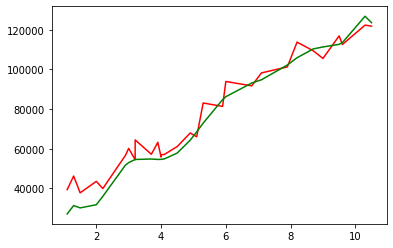

In [36]:
plt.plot(x,y,color='r')
plt.plot(x,y_predicted,color='g')